<a href="https://colab.research.google.com/github/0308priya/machine-learning-lab/blob/main/student_prediction_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive

# mount google drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
# load dataset
df = pd.read_csv('/content/drive/MyDrive/exams.csv')


In [ ]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [ ]:
#  Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

#  Load Dataset (already from Drive)
df = pd.read_csv("/content/drive/MyDrive/exams.csv")   # 👈 path ta thik kore dao

#  Create Target Column
df["average_score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)
df["performance"] = df["average_score"].apply(lambda x: "High" if x >= 70 else "Low")

#  Features (X) and Target (y)
X = df.drop(columns=["math score", "reading score", "writing score", "average_score", "performance"])
y = df["performance"]

# Encode categorical features
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include="object").columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

#  Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Train KNN Model
knn = KNeighborsClassifier(n_neighbors=5)   # default k=5
knn.fit(X_train_scaled, y_train)

#  Predictions
y_pred = knn.predict(X_test_scaled)

#  Results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.615

Classification Report:
               precision    recall  f1-score   support

        High       0.65      0.58      0.62       106
         Low       0.58      0.65      0.61        94

    accuracy                           0.61       200
   macro avg       0.62      0.62      0.61       200
weighted avg       0.62      0.61      0.62       200



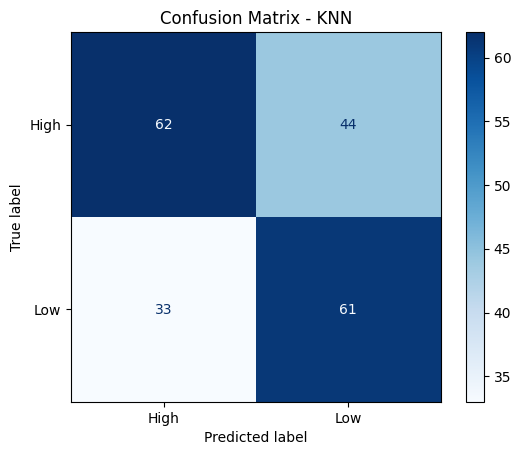

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.show()


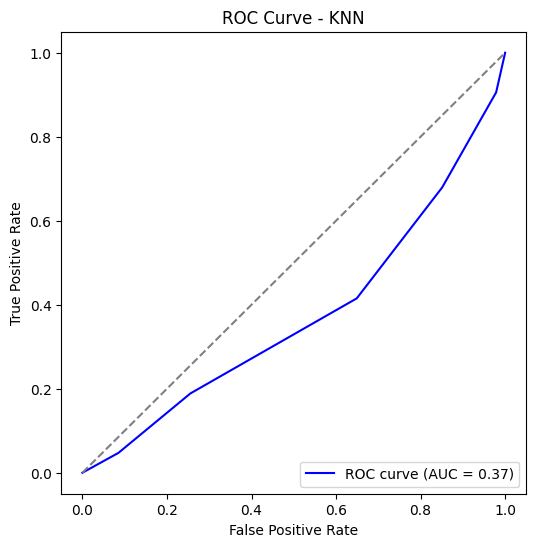

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

#  Probability prediction
y_prob = knn.predict_proba(X_test_scaled)[:, 1]   # Probability for "High" class

#  Encode y_test to binary (High=1, Low=0)
y_test_binary = (y_test == "High").astype(int)

#  ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)
roc_auc = auc(fpr, tpr)

#  Plot ROC
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend(loc="lower right")
plt.show()



Accuracy: 0.615

Classification Report:
               precision    recall  f1-score   support

        High       0.62      0.69      0.65       106
         Low       0.60      0.53      0.56        94

    accuracy                           0.61       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.61      0.61      0.61       200



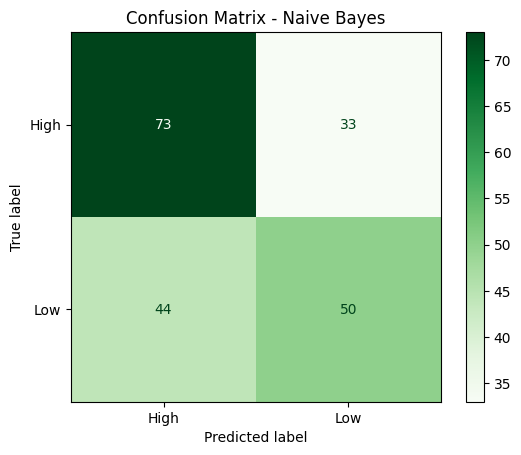

In [ ]:
#  Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#  Load Dataset (from Drive or Colab path)
df = pd.read_csv("/content/drive/MyDrive/exams.csv")   # 👈 path ta thik kore dao

#  Create Target Column
df["average_score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)
df["performance"] = df["average_score"].apply(lambda x: "High" if x >= 70 else "Low")

#  Features (X) and Target (y)
X = df.drop(columns=["math score", "reading score", "writing score", "average_score", "performance"])
y = df["performance"]

# Encode categorical features
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include="object").columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

#  Scale features (Naive Bayes optional, but improves performance sometimes)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Train Naive Bayes Model
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

#  Predictions
y_pred = nb.predict(X_test_scaled)

#  Results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot(cmap="Greens")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


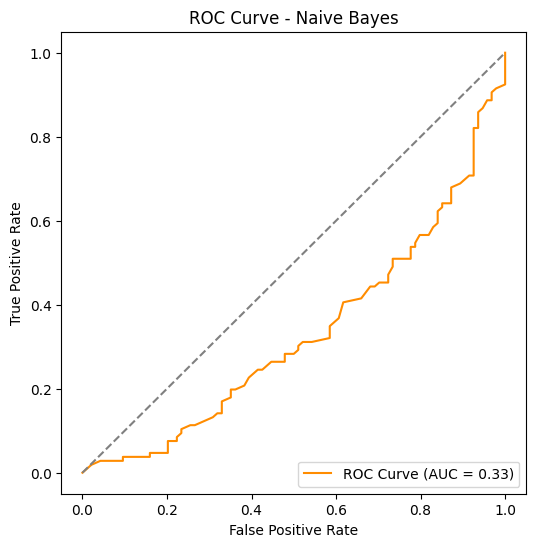

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#  Probability prediction (for "High" class)
y_prob = nb.predict_proba(X_test_scaled)[:, 1]

#  Encode y_test to binary (High=1, Low=0)
y_test_binary = (y_test == "High").astype(int)

#  ROC curve values
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)
roc_auc = auc(fpr, tpr)

#  Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="darkorange", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naive Bayes")
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.615

Classification Report:
               precision    recall  f1-score   support

        High       0.68      0.51      0.58       106
         Low       0.57      0.73      0.64        94

    accuracy                           0.61       200
   macro avg       0.63      0.62      0.61       200
weighted avg       0.63      0.61      0.61       200



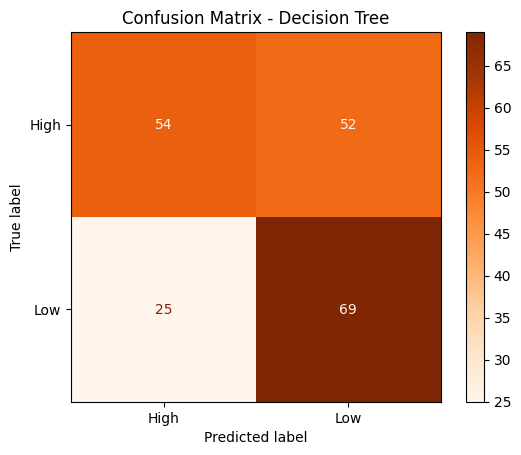

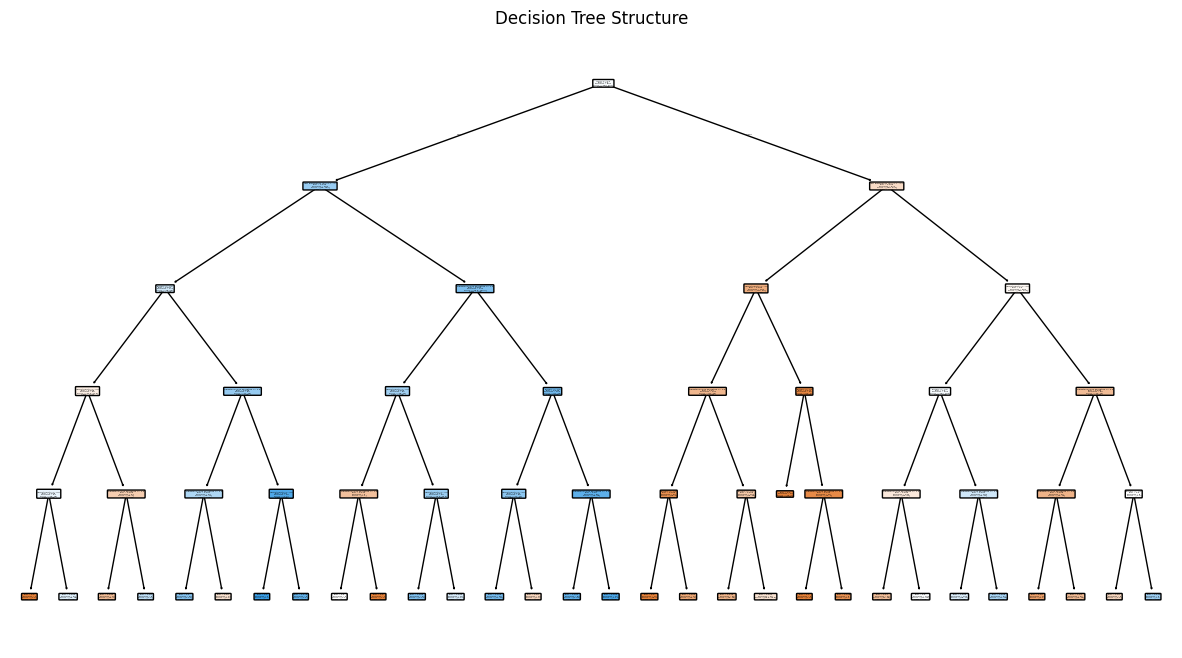

In [29]:
#  Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#  Load Dataset
df = pd.read_csv("/content/drive/MyDrive/exams.csv")   # 👈 path ta thik kore dao

#  Create Target Column
df["average_score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)
df["performance"] = df["average_score"].apply(lambda x: "High" if x >= 70 else "Low")

#  Features (X) and Target (y)
X = df.drop(columns=["math score", "reading score", "writing score", "average_score", "performance"])
y = df["performance"]

# Encode categorical features
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include="object").columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

#  Train Decision Tree Model
dt = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)  # you can try "entropy"
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

#  Results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot(cmap="Oranges")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

#  Visualize Decision Tree
plt.figure(figsize=(15,8))
plot_tree(dt, feature_names=X_encoded.columns, class_names=dt.classes_, filled=True, rounded=True)
plt.title("Decision Tree Structure")
plt.show()


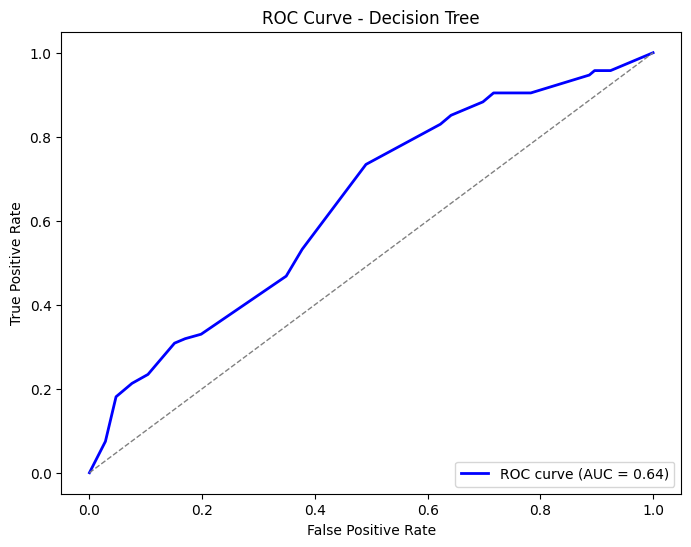

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer

# Encode target for ROC curve (binary: High=1, Low=0)
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_proba = dt.predict_proba(X_test)[:, 1]  # probability for "High"

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.605

Classification Report:
               precision    recall  f1-score   support

        High       0.65      0.55      0.59       106
         Low       0.57      0.67      0.61        94

    accuracy                           0.60       200
   macro avg       0.61      0.61      0.60       200
weighted avg       0.61      0.60      0.60       200



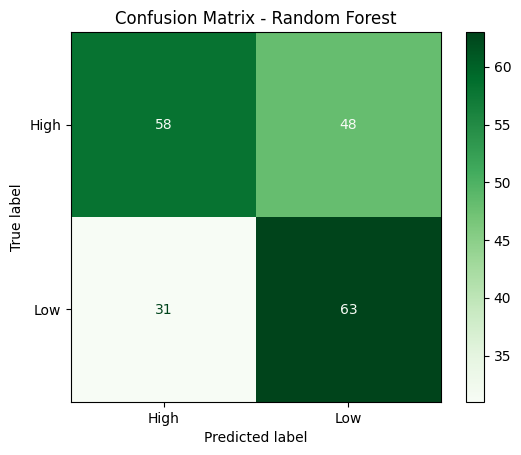

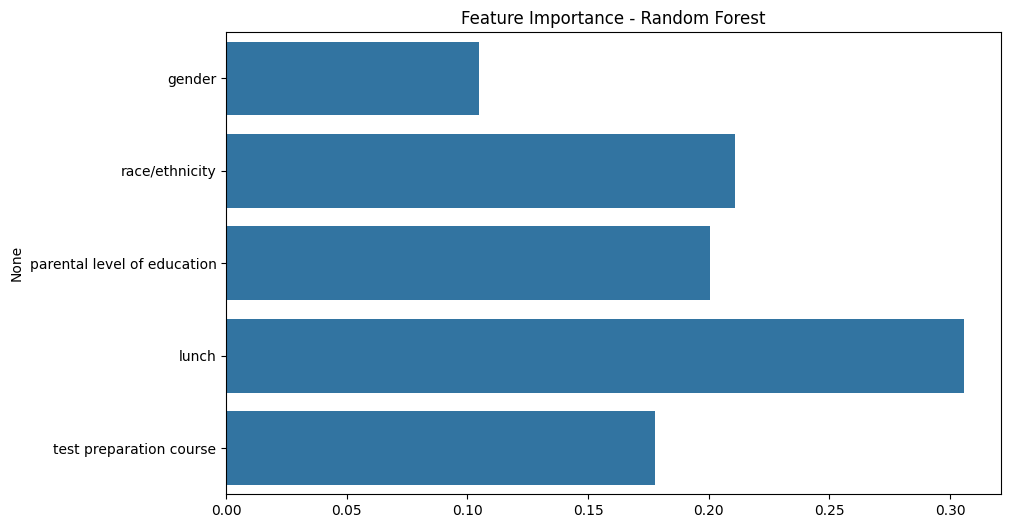

In [ ]:
#  Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#  Load Dataset
df = pd.read_csv("/content/drive/MyDrive/exams.csv")  # make sure path is correct

#  Create Target Column
df["average_score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)
df["performance"] = df["average_score"].apply(lambda x: "High" if x >= 70 else "Low")

#  Features (X) and Target (y)
X = df.drop(columns=["math score", "reading score", "writing score", "average_score", "performance"])
y = df["performance"]

# Encode categorical features
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include="object").columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

#  Train Random Forest Model
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

#  Predictions
y_pred = rf.predict(X_test)

#  Results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.show()

#  Feature Importance
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x=rf.feature_importances_, y=X_encoded.columns)
plt.title("Feature Importance - Random Forest")
plt.show()






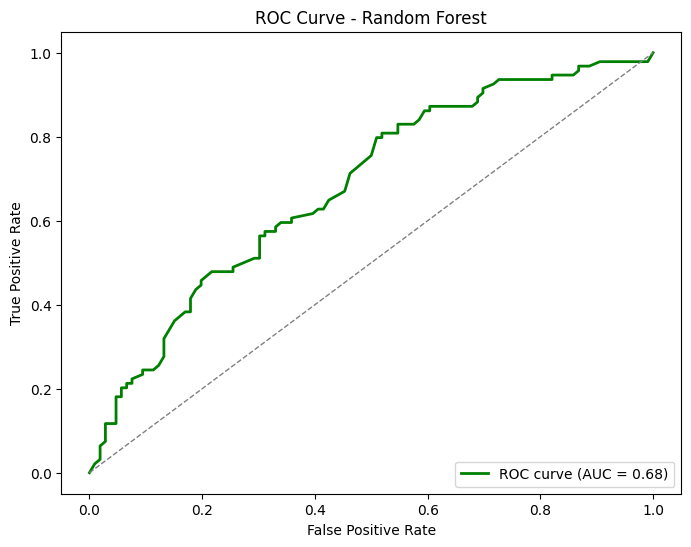

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Encode target for ROC (binary: High=1, Low=0)
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]  # probability for "High"

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()
